# Testes A/B

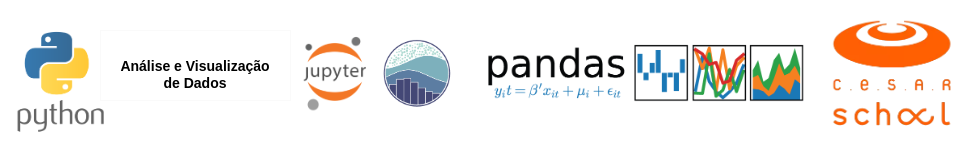


Um teste A/B é uma técnica de experimentação utilizada para comparar duas versões de um elemento ou recurso em um contexto específico. Testes A/B são amplamente utilizados em áreas como marketing, design de interface de usuário e desenvolvimento de produtos para determinar qual versão produz resultados melhores ou mais desejáveis.


Em geral a comparação é dada a partir de uma métrica definida, na qual uma ferramenta/produto é avaliado como o mais atraente para um grupo de usuários. Em geral, é realizado um experimento com uma versão base e outra com modificação.

## Roteiro

**Verificações**

1. Cheque se a distribuição é normal,
2. Se a for Distribuição Normal, verifique a homogeneidade.

**Passo a passo**

1. Divida e defina o grupo de controle e grupo de teste.
2. Aplique o teste de Shapiro para normalidade

  - Se for paramétrico, aplique o [Teste de Levene](https://www.statology.org/levenes-test-python/) para homogeneidade de variâncias.

    - Se for Paramétrico e possui homogeneidade de variâncias, aplique o [Teste T](https://thedatascientist.com/how-to-do-a-t-test-in-python/).

    - Se Paramétrico e não possui homogeneidade de variâncias, aplique o [Teste de Welch](https://www.statology.org/welch-t-test-python/).

  - Se não paramétrico, aplique o [Teste Mann Whitney U](https://www.statology.org/mann-whitney-u-test-python/) diretamente.



In [ ]:
# A/B Testing Function - Quick Solution

from scipy.stats import shapiro
import scipy.stats as stats

def AB_Test(dataframe, group, target):
  # PASSO 1 - Alterar o procesos de filtrar os grupos desejados
  groupA = dataframe[dataframe[group] == "A"]
  groupB = dataframe[dataframe[group] == "B"]

  # Assumindo que existe normalidade na distribuição
  ntA = shapiro(groupA)[1] < 0.05
  ntB = shapiro(groupB)[1] < 0.05
  # Dessa forma as hipóteses são:
  # H0: Distribuição é Normal - False
  # H1: Distribution não é Normal - True

    if (ntA == False) & (ntB == False): # "H0: Distribuição Normal"
        # Teste Paramétrico
        # Assumindo que as variáveis são homogenas
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeniedade: False
        # H1: Heterogeneidade: True

        if leveneTest == False:
            # Homogeniedade
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneo
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
    else:
        # Teste Não Paramétrico
        ttest = stats.mannwhitneyu(groupA, groupB)[1]
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True

    # Resultado
    temp = pd.DataFrame({"AB Hypothesis":[ttest < 0.05], "p-value":[ttest]})
    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")

    # Columns
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]

    # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")

    return temp

## Template Básico (*quick-win*)

In [ ]:
import random
import numpy as np
from scipy import stats

# Defininção de taxas de conversão para grupos A & B
conversion_rate_a = 0.10  # Taxa de conversão para versão A
conversion_rate_b = 0.12  # Taxa de conversão para versão B

# Defininção dos tamanhos de amostra para cada versão de dados
sample_size_a = 1000  # Número de usuários na versão A
sample_size_b = 1000  # Número de usuários na versão B

# Simulação de eventos de conversão para as versões A e B
conversions_a = np.random.binomial(sample_size_a, conversion_rate_a)
conversions_b = np.random.binomial(sample_size_b, conversion_rate_b)

# Calcular taxas de conversão
conversion_rate_est_a = conversions_a / sample_size_a
conversion_rate_est_b = conversions_b / sample_size_b

# Realizar Teste de Hipótese (two-tailed independent t-test)
t_stat, p_value = stats.ttest_ind(conversions_a, conversions_b)

# Listar os resultados
print("Versão A:")
print(f"Tamanho da Amostra: {sample_size_a}")
print(f"Conversão: {conversions_a}")
print(f"Taxa de Conversão: {conversion_rate_est_a:.2%}")
print()

print("Versão B:")
print(f"Tamanho da Amostra: {sample_size_b}")
print(f"Conversão: {conversions_b}")
print(f"Taxa de Conversão: {conversion_rate_est_b:.2%}")
print()

print("Teste de Hipótese:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
print()

# Verifique o nível de significância (em geral definido como 0.05)

alpha = 0.05

# Verificar se o p-value é menor que o nível de significância
if p_value < alpha:
    print("A diferença nas taxas de conversão entre as versões A e B é estatisticamente significativa.")
else:
    print("A diferença nas taxas de conversão entre as versões A e B não é estatisticamente significativa.")


Versão A:
Tamanho da Amostra: 1000
Conversão: 107
Taxa de Conversão: 10.70%

Versão B:
Tamanho da Amostra: 1000
Conversão: 126
Taxa de Conversão: 12.60%

Teste de Hipótese:
t-statistic: nan
p-value: nan

A diferença nas taxas de conversão entre as versões A e B não é estatisticamente significativa.


<ipython-input-1-99d50f8486f0>:22: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(conversions_a, conversions_b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


## Referências Técnicas

- [Passo a passo de Testes A/B - Kaggle](https://www.kaggle.com/code/ekrembayar/a-b-testing-step-by-step-hypothesis-testing)

- [Marketing A/B Testing](https://www.kaggle.com/code/privetalina/a-b-testing)

- [Grocery Store A/B Testing](https://www.kaggle.com/code/songulerdem/a-b-testing-on-grocery-website-data)